In [2]:
import pandas as pd 

In [3]:
# read the data from '../res/sample_taxi.csv'. 
data = pd.read_csv('../res/sample_taxi.csv') 

In [4]:
data.head() 

,taxi_id,time,lon,lat,is_passenger,speed
0,22224,10:13:42,113.887032,22.547518,0,0
1,22224,19:31:36,113.909554,22.582199,1,71
2,22224,17:06:32,113.916748,22.623550,1,100
3,22224,15:07:19,113.922432,22.535383,1,21
4,22224,14:55:18,113.922668,22.520033,1,10


In [5]:
print (f'batch size: {len(data)}')

batch size: 9843421


In [6]:
# only keeps the time & the taxi_id info, build the relation map (taxi_id -> list<time>) 
taxi_id_to_time = {} 
taxi_ids = data['taxi_id'] 
times = data['time'] 
index = 0
for taxi_id, time in zip(taxi_ids, times): 
    if index % 1000000 == 0: 
        print (f'processing {index}th row') 
    if taxi_id not in taxi_id_to_time: 
        taxi_id_to_time[taxi_id] = [] 
    taxi_id_to_time[taxi_id].append(time) 
    index += 1
# for index, row in data.iterrows(): 
#     if index % 100000 == 0: 
#         print (f'processing {index}th row') 
#     taxi_id = row['taxi_id'] 
#     time = row['time'] 
#     if taxi_id not in taxi_id_to_time: 
#         taxi_id_to_time[taxi_id] = [] 
#     taxi_id_to_time[taxi_id].append(time) 

processing 0th row
processing 1000000th row
processing 2000000th row
processing 3000000th row
processing 4000000th row
processing 5000000th row
processing 6000000th row
processing 7000000th row
processing 8000000th row
processing 9000000th row


In [7]:
print (f'number of taxi: {len(taxi_id_to_time)}')

number of taxi: 3000


In [8]:
# get one entry from the map 
taxi_id = list(taxi_id_to_time.keys())[0] 
print (f'taxi_id: {taxi_id}') 
l = taxi_id_to_time[taxi_id] 
l.sort() 
print (f'len: {len(l)}')
for i in l : 
    print (i) 

taxi_id: 22224
len: 4295
00:00:12
00:00:27
00:00:42
00:00:57
00:01:23
00:01:27
00:01:42
00:01:57
00:02:12
00:02:27
00:02:42
00:02:56
00:03:12
00:03:28
00:03:43
00:06:04
00:07:30
00:07:32
00:07:33
00:07:51
00:08:03
00:08:18
00:08:33
00:08:59
00:09:03
00:09:18
00:09:33
00:09:48
00:10:03
00:10:48
00:11:26
00:11:27
00:11:45
00:11:55
00:12:10
00:12:25
00:12:40
00:12:55
00:13:10
00:13:40
00:13:56
00:14:11
00:14:26
00:14:41
00:14:56
00:16:28
00:16:30
00:16:34
00:16:49
00:17:04
00:17:19
00:17:34
00:17:49
00:18:04
00:18:19
00:18:34
00:18:49
00:19:04
00:19:19
00:19:34
00:19:49
00:20:04
00:20:19
00:20:35
00:20:50
00:21:05
00:21:20
00:21:35
00:21:50
00:22:05
00:22:20
00:22:35
00:22:50
00:23:05
00:23:20
00:23:35
00:23:50
00:24:05
00:24:20
00:24:35
00:24:50
00:25:06
00:25:21
00:25:36
00:25:51
00:26:06
00:26:21
00:26:36
00:26:51
00:27:06
00:27:21
00:27:36
00:27:51
00:28:06
00:28:21
00:28:36
00:28:51
00:29:06
00:29:21
00:29:36
00:29:51
00:30:06
00:30:21
00:30:36
00:30:51
00:31:06
00:31:21
00:31:36
00:

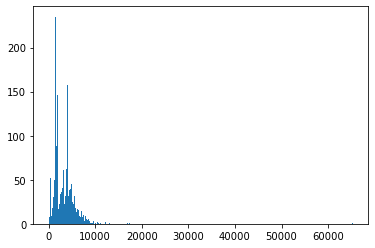

In [9]:
items_lens = {} 
for taxi_id, times in taxi_id_to_time.items(): 
    items_lens[taxi_id] = len(times) 

times = items_lens.values() 

# plot the distribution of the number of items 
import matplotlib.pyplot as plt 
plt.hist(times, bins=600) 
plt.show() 


In [10]:
minimum_len = min(times) 
maximum_len = max(times) 
print (f'minimum_len: {minimum_len}') 
print (f'maximum_len: {maximum_len}') 

minimum_len: 1
maximum_len: 65315


In [11]:
for taxi_id, times in taxi_id_to_time.items(): 
    if len(times) == maximum_len: 
        find_id = taxi_id
        print (f'taxi_id: {taxi_id}') 
        break 

taxi_id: 28249


In [12]:
data.head()

,taxi_id,time,lon,lat,is_passenger,speed
0,22224,10:13:42,113.887032,22.547518,0,0
1,22224,19:31:36,113.909554,22.582199,1,71
2,22224,17:06:32,113.916748,22.623550,1,100
3,22224,15:07:19,113.922432,22.535383,1,21
4,22224,14:55:18,113.922668,22.520033,1,10


In [13]:
data2 = data[data['taxi_id'] == find_id] 
data2 = data2.sort_values(by=['time']) 
# show all the data 
with open('log.txt', 'w') as o: 
    # print to o 
    for index, row in data2.iterrows(): 
        o.write(f'{row["taxi_id"]}, {row["time"]}, {row["lon"]}, {row["lat"]}, {row["is_passenger"]}, {row["speed"]}\n') 
        # print (f'{row["taxi_id"]}, {row["time"]}, {row["longitude"]}, {row["latitude"]}') 

In [14]:
# select the textid with the size less than 100 
selects = {k: v for k, v in taxi_id_to_time.items() if len(v) < 1000} 
print (f'number of taxi: {len(selects)}') 


number of taxi: 195


In [15]:
for (a, b) in selects.items(): 
    print (a)
    data[data['taxi_id'] == a].to_csv(f'../res/{a}.csv', index=False)

22240
22286
22310
22311
22350
22466
22525
22550
22657
22716
22776
22908
23006
23104
23200
23217
23305
23306
23369
23461
23555
23609
23631
23649
24043
24075
24183
24188
24197
24227
24236
24257
24431
24459
24483
24562
24655
24670
24730
25233
25334
25387
25461
25492
25548
25563
25592
25636
25688
25787
25944
26339
26474
26505
26525
26549
26569
26607
26736
26748
26767
26779
26802
26826
26843
26902
26931
26959
27042
27043
27055
27071
27099
27132
27151
27199
27404
27809
27828
27990
27991
28004
28068
28184
28246
28348
28357
28454
28699
28737
28738
28769
28900
28926
28977
29033
29036
29384
29517
29543
29603
29657
29658
29671
29717
29722
29829
29845
29876
29904
29921
29964
30001
30099
30279
30348
30358
30518
30603
30655
30664
30721
30732
30788
31092
31164
31186
31277
31477
31516
31545
31548
31605
31641
31673
31680
31771
31773
31788
31816
31842
31846
31859
32106
32115
32282
32511
32539
32540
32543
32558
32598
32639
32744
32809
32816
32846
33038
33052
33126
33129
33138
33222
33224
33349
33389
3343